## Run Evaluation
## Introduction
This notebook is for evaluation of LaPSUM.

It expects the data to be loaded from the evaluation trial.

### Import Libraries


In [1]:
import os
import sys
sys.path.append(os.path.abspath("../"))

In [2]:
import re  # For regex-based extraction of scores and explanations
import pandas as pd
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOllama

In [ ]:
data = pd.concat([pd.read_csv(f"../data/generated/generated_{i}.csv") for i in range(1,7)], ignore_index=True)
len(data)

540

In [ ]:
data = data.sort_values(by=['question_id', 'project', 'run_id'])
data['response_label'] = data.groupby(['question_id', 'project']).cumcount() + 1
data['response_label'] = 'response_' + data['response_label'].astype(str)

# Step 2: Pivot final_response
response_pivot = data.pivot_table(
    index=['question_id', 'project'],
    columns='response_label',
    values='final_response',
    aggfunc='first'
)

# Step 3: Extract one question per (question_id, project)
question_lookup = data.drop_duplicates(subset=['question_id', 'project'])[['question_id', 'project', 'question']]

# Step 4: Merge the question back into the pivoted data
final_df = pd.merge(question_lookup, response_pivot.reset_index(), on=['question_id', 'project'])

# Optional: Reorder columns
cols = ['question_id', 'project', 'question'] + [col for col in final_df.columns if col.startswith('response_')]
final_df = final_df[cols]


   question_id                    project  \
0            1         groovy/groovy-core   
1            1          joestelmach/natty   
2            1         pedrovgs/Renderers   
3            1  sstrickx/yahoofinance-api   
4            1                  wg/scrypt   

                                            question  \
0  Is there an entity named something like FloatA...   
1  Is there an entity named something like Abstra...   
2  Is there an entity named something like SubObj...   
3  Is there an entity named something like Utils ...   
4  Is there an entity named something like JarLib...   

                                          response_1  \
0  Based on the limited information provided, I c...   
1  So yes, there is an entity named exactly 'Abst...   
2  Yes, there is an entity named SubObjectRendere...   
3  So yes, there is an entity named 'Utils' in th...   
4  Yes, there is an entity named JarLibraryLoader...   

                                          response_2  \

In [10]:
final_df.to_csv("../data/generated/combined_reponse.csv", index=False)

In [11]:
final_df.head(5)

,question_id,project,question,response_1,response_2,response_3,response_4,response_5,response_6
0,1,groovy/groovy-core,Is there an entity named something like FloatA...,"Based on the limited information provided, I c...","Based on the provided information, there doesn...","Yes, there is an entity named exactly 'FloatAr...","Based on the limited information provided, I c...","\n\nUnfortunately, this information is incompl...","Based on the limited information provided, I c..."
1,1,joestelmach/natty,Is there an entity named something like Abstra...,"So yes, there is an entity named exactly 'Abst...","So yes, there is an entity named 'AbstractGram...","Yes, there is an entity named exactly 'Abstrac...","Yes, there is an entity named AbstractGrammarT...",\n\nI can confirm that there is an entity name...,"Yes, there is an entity named 'AbstractGrammar..."
2,1,pedrovgs/Renderers,Is there an entity named something like SubObj...,"Yes, there is an entity named SubObjectRendere...","Yes, there is an entity named exactly 'SubObje...","Yes, there is an entity named exactly 'SubObje...","Yes, there is an entity named exactly 'SubObje...","\n\nUnfortunately, I don't see any entity name...","Yes, there is an entity named exactly 'SubObje..."
3,1,sstrickx/yahoofinance-api,Is there an entity named something like Utils ...,"So yes, there is an entity named 'Utils' in th...","Yes, there is an entity named 'Utils' in the s...","Yes, there is an entity named 'Utils' in the s...","Yes, there is an entity named 'Utils' in the s...","\n\nYes, there is an entity named ""Utils"" in t...","Yes, there is an entity named 'Utils' in the s..."
4,1,wg/scrypt,Is there an entity named something like JarLib...,"Yes, there is an entity named JarLibraryLoader...","Based on the information available, there is i...","So yes, there is an entity named exactly 'JarL...","Yes, there is an entity named exactly 'JarLibr...","\n\nSo yes, there is an entity named JarLibrar...",Error: cound not answer


## Evaluation (External)

In [ ]:
# Move the evaluation code here

## Analysis 

In [13]:
data = pd.read_csv("../data/generated/llama-3.3-70b-versatile.csv")

In [14]:
data.head()

,Unnamed: 0,original_index,project,question_id,question,explanation_1,explanation_2,explanation_3,explanation_4,explanation_5,...,response_3,response_4,response_5,response_6,score_1,score_2,score_3,score_4,score_5,score_6
0,0,0,groovy/groovy-core,1,Is there an entity named something like FloatA...,The response is relevant to the question and a...,The developer's response is relevant to the qu...,This response is a perfect answer to the quest...,The response is relevant to the question and a...,This response is not relevant to the question ...,...,"Yes, there is an entity named exactly 'FloatAr...","Based on the limited information provided, I c...","Unfortunately, this information is incomplete ...","Based on the limited information provided, I c...",6,8,10,7,2,7
1,1,1,joestelmach/natty,1,Is there an entity named something like Abstra...,This response is highly relevant to the questi...,This response is highly relevant to the questi...,The response is highly relevant to the questio...,The response is directly relevant to the quest...,The response is directly relevant to the quest...,...,"Yes, there is an entity named exactly 'Abstrac...","Yes, there is an entity named AbstractGrammarT...",I can confirm that there is an entity named Ab...,"Yes, there is an entity named 'AbstractGrammar...",9,9,10,8,8,8
2,2,2,pedrovgs/Renderers,1,Is there an entity named something like SubObj...,The response is highly relevant to the questio...,The response is highly relevant to the questio...,"The response is very relevant to the question,...",The response is very relevant to the question ...,The developer's response is relevant to the qu...,...,"Yes, there is an entity named exactly 'SubObje...","Yes, there is an entity named exactly 'SubObje...","Unfortunately, I don't see any entity named ""S...","Yes, there is an entity named exactly 'SubObje...",9,9,9,9,8,10
3,3,3,sstrickx/yahoofinance-api,1,Is there an entity named something like Utils ...,The response is directly relevant to the quest...,This response is relevant to the question and ...,The response is directly relevant to the quest...,The response is directly relevant to the quest...,The response is relevant to the question and d...,...,"Yes, there is an entity named 'Utils' in the s...","Yes, there is an entity named 'Utils' in the s...","Yes, there is an entity named ""Utils"" in the s...","Yes, there is an entity named 'Utils' in the s...",8,8,8,8,8,8
4,4,4,wg/scrypt,1,Is there an entity named something like JarLib...,The response is relevant and answers the quest...,The response is relevant to the question and d...,The response is very relevant to the question ...,This response is a direct and concise answer t...,The response is relevant and directly answers ...,...,"So yes, there is an entity named exactly 'JarL...","Yes, there is an entity named exactly 'JarLibr...","So yes, there is an entity named JarLibraryLoa...",Error: cound not answer,8,8,9,10,8,1


Take the highst score per 

In [15]:
data.columns

Index(['Unnamed: 0', 'original_index', 'project', 'question_id', 'question',
       'explanation_1', 'explanation_2', 'explanation_3', 'explanation_4',
       'explanation_5', 'explanation_6', 'response_1', 'response_2',
       'response_3', 'response_4', 'response_5', 'response_6', 'score_1',
       'score_2', 'score_3', 'score_4', 'score_5', 'score_6'],
      dtype='object')

In [39]:
# data["score_A"] = data[['score_1', 'score_2']].max(axis=1)
# data["score_B"] = data[['score_3', 'score_4']].max(axis=1)
# data["score_C"] = data[['score_5', 'score_6']].max(axis=1)


data["score_A"] = (data["score_1"] + data["score_2"]) /2
data["score_B"] = (data["score_3"] + data["score_4"]) /2
data["score_C"] = (data["score_5"] + data["score_6"]) /2

In [40]:
data[["question_id","score_A", "score_B", "score_C"]].head(5)

,question_id,score_A,score_B,score_C
0,1,7.0,8.5,4.5
1,1,9.0,9.0,8.0
2,1,9.0,9.0,9.0
3,1,8.0,8.0,8.0
4,1,8.0,9.5,4.5


In [41]:
data.groupby('question_id')[['score_A', 'score_B', 'score_C']].mean()  # Per-question average

,score_A,score_B,score_C
question_id,,,
1,8.2,8.8,6.8
2,7.2,5.9,7.3
3,5.9,6.1,5.2
4,6.1,4.5,4.6
5,1.8,1.6,1.8
6,3.0,1.7,2.6
7,4.9,3.5,5.2
8,5.9,3.9,4.8
9,5.6,5.0,5.5


In [42]:
# Overall mean and std
data[['score_A', 'score_B', 'score_C']].describe()

,score_A,score_B,score_C
count,90.000000,90.000000,90.000000
mean,4.955556,4.461111,4.883333
std,2.603632,2.618246,2.421869
min,1.000000,1.000000,1.000000
25%,3.500000,1.500000,3.625000
50%,4.500000,4.500000,4.500000
75%,7.500000,7.000000,7.000000
max,9.500000,10.000000,9.500000


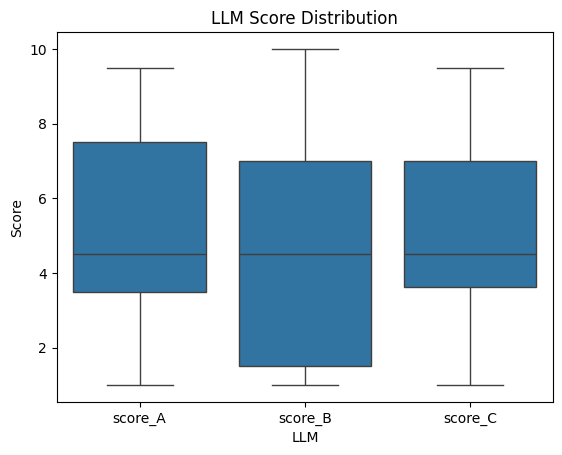

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = data.melt(id_vars=['question_id'], value_vars=['score_A', 'score_B', 'score_C'],
                    var_name='LLM', value_name='Score')

sns.boxplot(x='LLM', y='Score', data=df_melted)
plt.title("LLM Score Distribution")
plt.show()

In [44]:
from scipy.stats import ttest_rel

ttest_rel(data['score_A'], data['score_B'])

TtestResult(statistic=np.float64(1.6985554414393087), pvalue=np.float64(0.09289648618252584), df=np.int64(89))

In [45]:
import numpy as np

# Calculate differences
diff = data['score_A'] - data['score_B']

# Cohen's d
mean_diff = diff.mean()
std_diff = diff.std(ddof=1)
cohens_d = mean_diff / std_diff

print(f"Cohen's d (A vs B): {cohens_d:.3f}")

Cohen's d (A vs B): 0.179


In [46]:
import numpy as np

# Calculate differences
diff = data['score_C'] - data['score_B']

# Cohen's d
mean_diff = diff.mean()
std_diff = diff.std(ddof=1)
cohens_d = mean_diff / std_diff

print(f"Cohen's d (C vs B): {cohens_d:.3f}")

Cohen's d (C vs B): 0.136


In [47]:
import numpy as np

# Calculate differences
diff = data['score_C'] - data['score_A']

# Cohen's d
mean_diff = diff.mean()
std_diff = diff.std(ddof=1)
cohens_d = mean_diff / std_diff

print(f"Cohen's d (C vs A): {cohens_d:.3f}")

Cohen's d (C vs A): -0.027


In [48]:
t_stat, p_value = ttest_rel(data['score_A'], data['score_B'])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_value:.4f}")

Paired t-test: t = 1.699, p = 0.0929


In [49]:
t_stat, p_value = ttest_rel(data['score_A'], data['score_C'])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_value:.4f}")

Paired t-test: t = 0.251, p = 0.8020


In [50]:
t_stat, p_value = ttest_rel(data['score_C'], data['score_B'])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_value:.4f}")

Paired t-test: t = 1.295, p = 0.1988


In [52]:
from itertools import combinations

for a, b in combinations(['score_A', 'score_B', 'score_C'], 2):
    diff = data[a] - data[b]
    d = diff.mean() / diff.std(ddof=1)
    t, p = ttest_rel(data[a], data[b])
    print(f"{a} vs {b} → Cohen's d: {d:.3f}, p-value: {p:.4f}")

score_A vs score_B → Cohen's d: 0.179, p-value: 0.0929
score_A vs score_C → Cohen's d: 0.027, p-value: 0.8020
score_B vs score_C → Cohen's d: -0.136, p-value: 0.1988


In [54]:
from statsmodels.stats.power import TTestPower

# Inputs
effect_size = 0.5       # medium effect (or use your calculated Cohen's d)
alpha = 0.05            # significance level
power = 0.8             # desired power

analysis = TTestPower()
required_n = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
print(f"Required number of questions: {int(np.ceil(required_n))}")

Required number of questions: 34
